In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Exploratory Data Analysis (EDA) for Disease Prediction Dataset

 Load dataset

In [3]:
df = pd.read_csv("Training.csv")
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


Drop any unnecessary columns

In [4]:
df = df.drop(columns=["Unnamed: 133"], errors='ignore')
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


1. Basic Dataset Overview

In [5]:
print("Dataset Shape:", df.shape)

Dataset Shape: (4920, 133)


In [6]:
print("\nMissing Values:\n", df.isnull().sum().sum())


Missing Values:
 0


In [7]:
print("\nUnique Prognosis Labels:", df['prognosis'].nunique())


Unique Prognosis Labels: 41


In [8]:
print("\nSample Prognosis Classes:\n", df['prognosis'].unique()[:10])


Sample Prognosis Classes:
 ['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma']


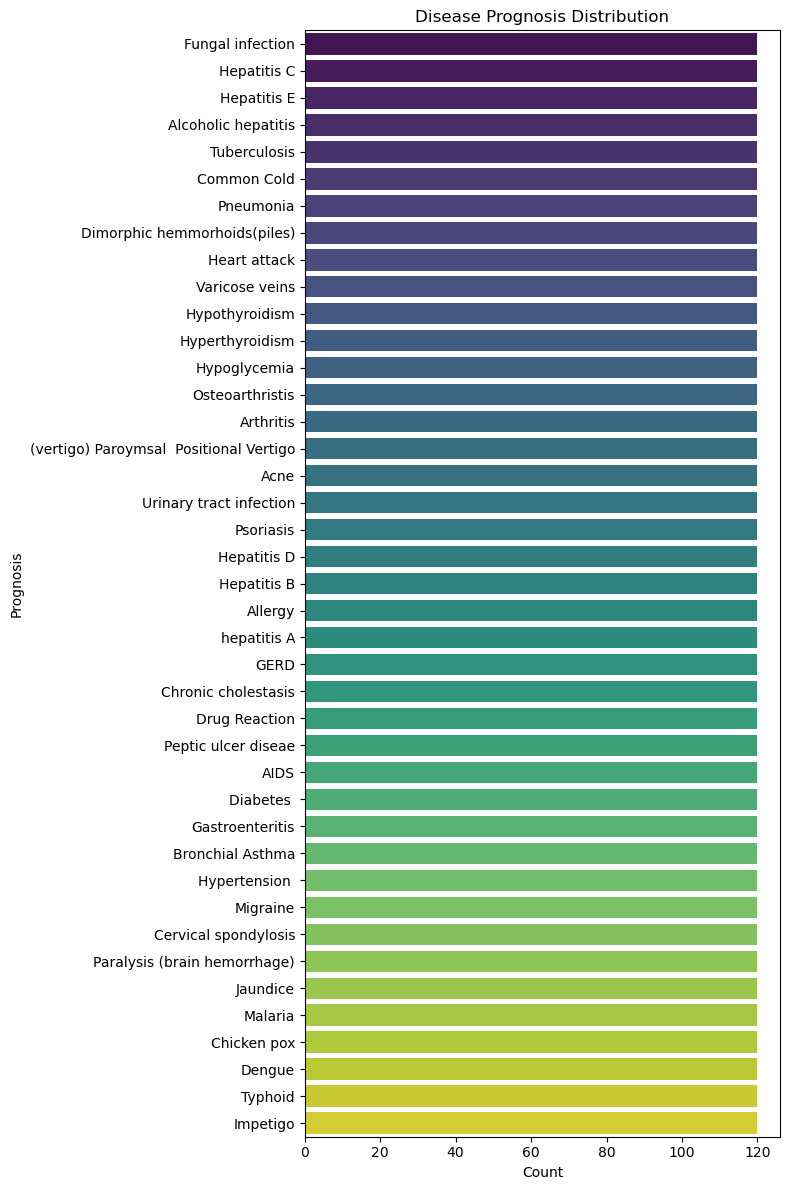

In [9]:
value_counts = df['prognosis'].value_counts()
plt.figure(figsize=(8, 12))
sns.barplot(x=value_counts.values, y=value_counts.index, hue=value_counts.index,
            palette="viridis", dodge=False, legend=False)
plt.title("Disease Prognosis Distribution")
plt.xlabel("Count")
plt.ylabel("Prognosis")
plt.tight_layout()
plt.show()

2. Prognosis Class Distribution

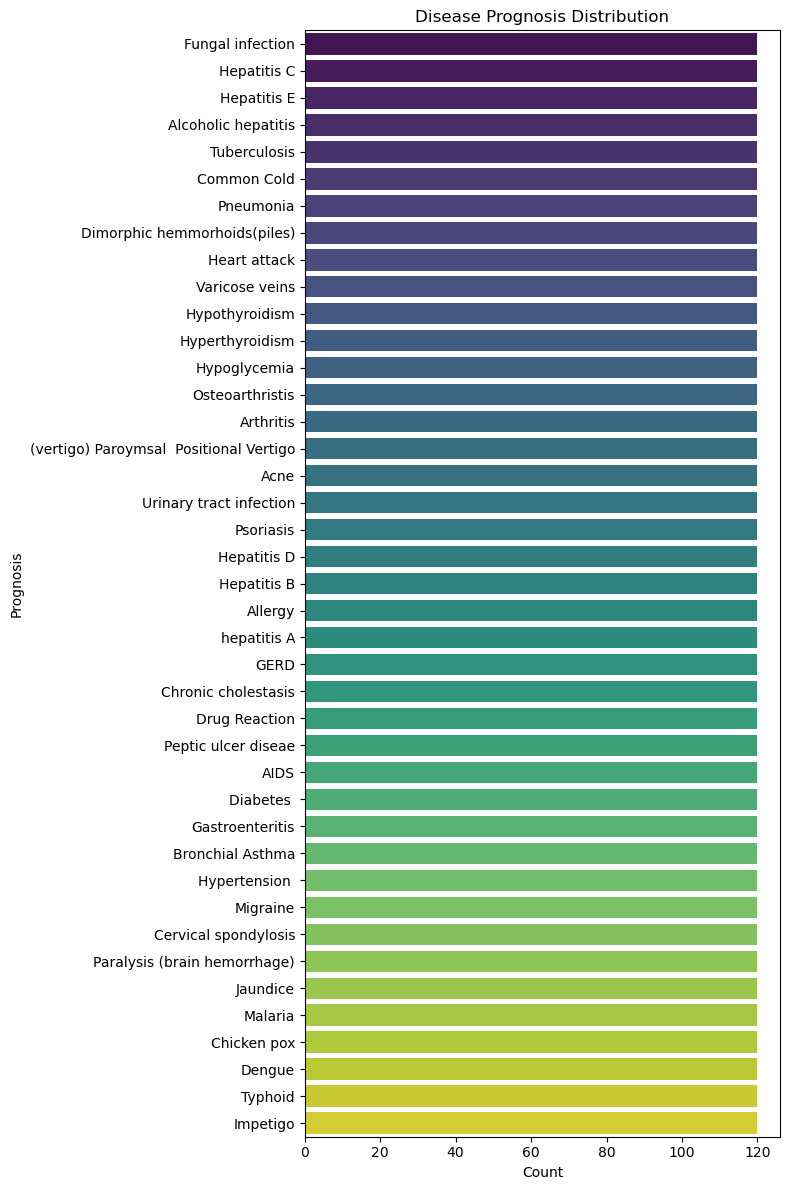

In [10]:
value_counts = df['prognosis'].value_counts()
plt.figure(figsize=(8, 12))
sns.barplot(x=value_counts.values, y=value_counts.index, hue=value_counts.index,
            palette="viridis", dodge=False, legend=False)
plt.title("Disease Prognosis Distribution")
plt.xlabel("Count")
plt.ylabel("Prognosis")
plt.tight_layout()
plt.show()

3. Symptoms Frequency Analysis

3a. Count how often each symptom appears

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6888\179873081.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=symptom_counts.index[:20], x=symptom_counts.values[:20], palette="magma")


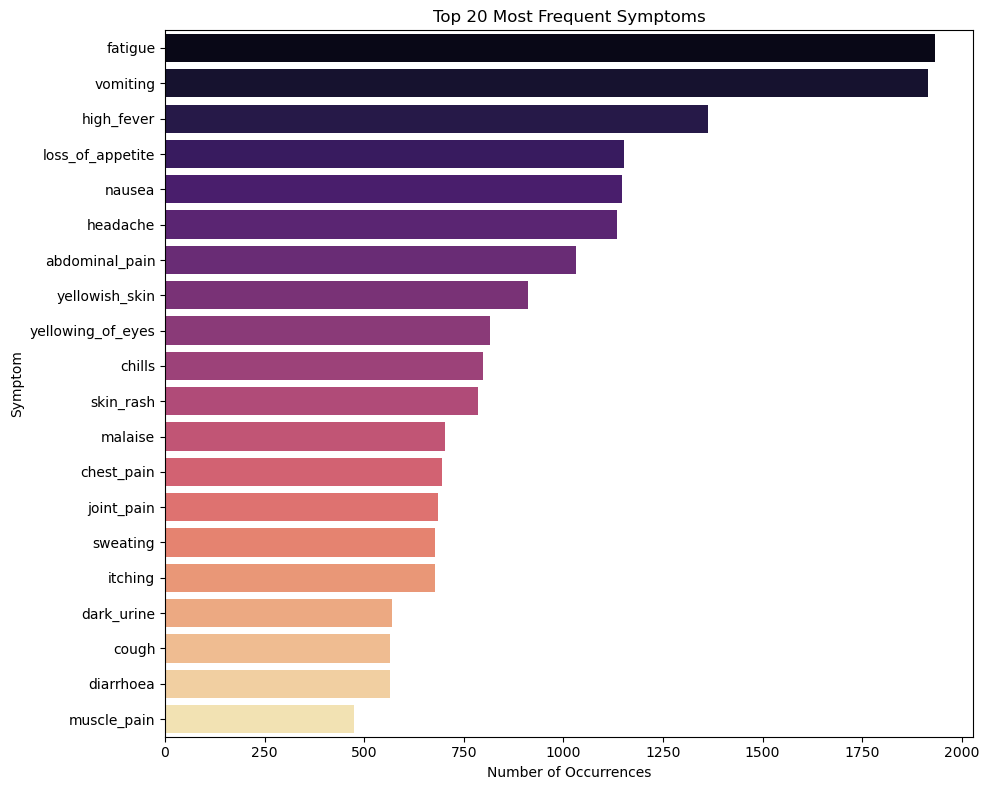

In [11]:
symptom_counts = df.drop(columns=["prognosis"]).sum().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(y=symptom_counts.index[:20], x=symptom_counts.values[:20], palette="magma")
plt.title("Top 20 Most Frequent Symptoms")
plt.xlabel("Number of Occurrences")
plt.ylabel("Symptom")
plt.tight_layout()
plt.show()

3b. Number of symptoms per patient

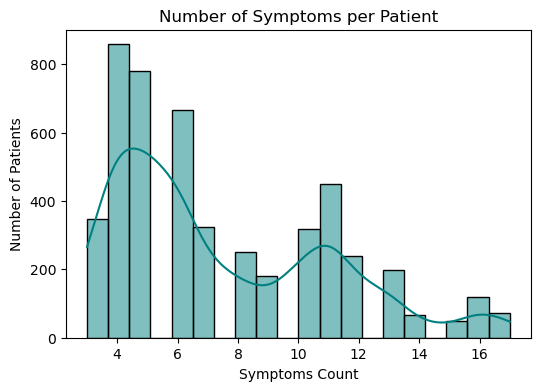

In [12]:
symptom_only_df = df.drop(columns=["prognosis"])
df["num_symptoms"] = symptom_only_df.sum(axis=1)

plt.figure(figsize=(6, 4))
sns.histplot(df["num_symptoms"], bins=20, kde=True, color='teal')
plt.title("Number of Symptoms per Patient")
plt.xlabel("Symptoms Count")
plt.ylabel("Number of Patients")
plt.show()


4. Symptom Correlation Heatmap

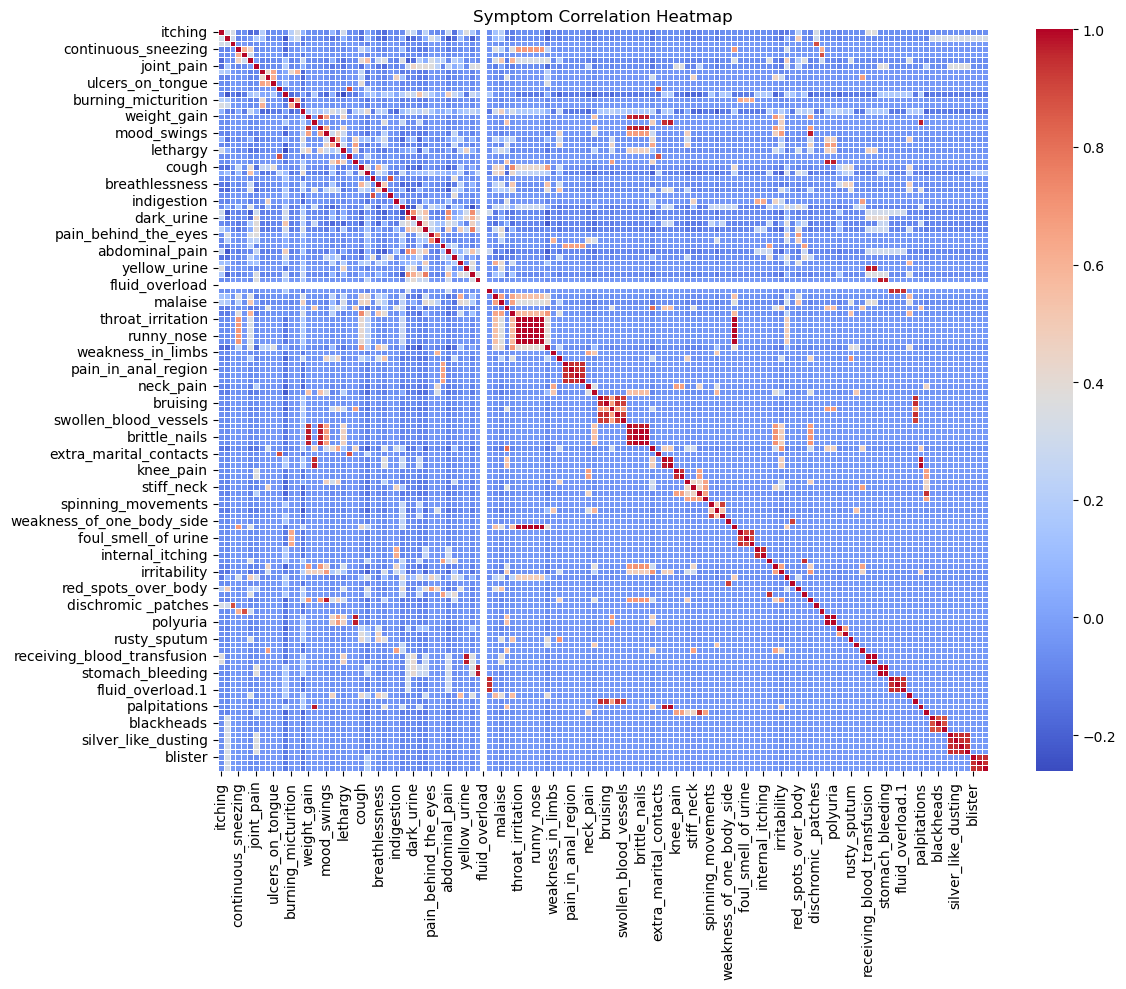

In [13]:
plt.figure(figsize=(12, 10))
correlation = symptom_only_df.corr()
sns.heatmap(correlation, cmap='coolwarm', linewidths=0.5)
plt.title("Symptom Correlation Heatmap")
plt.tight_layout()
plt.show()

# 5. Model Training and Evaluation

In [14]:
df = df.drop(columns=["num_symptoms"], errors='ignore')

X = df.drop(columns=["prognosis"])
y = df["prognosis"]

Encode the labels

In [15]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Logistic Regression

In [16]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X, y_encoded)
y_pred_logreg = logreg.predict(X)

# K-Nearest Neighbors

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y_encoded)
y_pred_knn = knn.predict(X)

# Accuracy Scores

In [18]:
acc_logreg = accuracy_score(y_encoded, y_pred_logreg)
acc_knn = accuracy_score(y_encoded, y_pred_knn)
print("\nLogistic Regression Accuracy:", acc_logreg)
print("KNN Accuracy:", acc_knn)


Logistic Regression Accuracy: 1.0
KNN Accuracy: 1.0


# Classification Reports

In [19]:
print("\nClassification Report - Logistic Regression:\n")
print(classification_report(y_encoded, y_pred_logreg, target_names=le.classes_))


Classification Report - Logistic Regression:

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00       120
                                   AIDS       1.00      1.00      1.00       120
                                   Acne       1.00      1.00      1.00       120
                    Alcoholic hepatitis       1.00      1.00      1.00       120
                                Allergy       1.00      1.00      1.00       120
                              Arthritis       1.00      1.00      1.00       120
                       Bronchial Asthma       1.00      1.00      1.00       120
                   Cervical spondylosis       1.00      1.00      1.00       120
                            Chicken pox       1.00      1.00      1.00       120
                    Chronic cholestasis       1.00      1.00      1.00       120
                            Common Cold       1.00      1.00 

In [20]:
print("\nClassification Report - KNN:\n")
print(classification_report(y_encoded, y_pred_knn, target_names=le.classes_))


Classification Report - KNN:

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00       120
                                   AIDS       1.00      1.00      1.00       120
                                   Acne       1.00      1.00      1.00       120
                    Alcoholic hepatitis       1.00      1.00      1.00       120
                                Allergy       1.00      1.00      1.00       120
                              Arthritis       1.00      1.00      1.00       120
                       Bronchial Asthma       1.00      1.00      1.00       120
                   Cervical spondylosis       1.00      1.00      1.00       120
                            Chicken pox       1.00      1.00      1.00       120
                    Chronic cholestasis       1.00      1.00      1.00       120
                            Common Cold       1.00      1.00      1.00       

# Load the test data

In [22]:
test_df = pd.read_csv("Testing.csv")  
test_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


# Prepare features and encode labels (same as training)

In [23]:
X_test = test_df.drop("prognosis", axis=1)
y_test = le.transform(test_df["prognosis"])  # use the same LabelEncoder from training

# Predict using trained models

In [24]:
y_pred_logreg_test = logreg.predict(X_test)
y_pred_knn_test = knn.predict(X_test)

# Accuracy on test data

In [25]:
from sklearn.metrics import accuracy_score
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_logreg_test))
print("KNN Test Accuracy:", accuracy_score(y_test, y_pred_knn_test))

Logistic Regression Test Accuracy: 1.0
KNN Test Accuracy: 1.0


# Further Testing Through User Input

7. Prediction Function

In [26]:
while True:
    user_input = input("\nEnter comma-separated symptoms (e.g., headache,fatigue): ")
    input_symptoms = [sym.strip() for sym in user_input.lower().split(',') if sym.strip() in symptom_list]
    if not input_symptoms:
        print("No valid symptoms entered. Try again.")
        continue
    predict_disease(input_symptoms)
    more = input("\nDo you want to predict again? (y/n): ").strip().lower()
    if more != 'y':
        break


Enter comma-separated symptoms (e.g., headache,fatigue):  headache,vomiting,skin rash


C:\ana\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\ana\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



Predicted Disease (Logistic Regression): Paralysis (brain hemorrhage)
Predicted Disease (KNN): Paralysis (brain hemorrhage)



Do you want to predict again? (y/n):  n
